# (DATA INVESTIGATION USING VISUALIZATION FOR TITANIC DATA SET)
## by (HASSAN ALI)

## Investigation Overview

we will investigate what the most gender survived and the most port passenger embarked from and what other feature related to these passenger form this port like the most gender survived the most common age and most common family size<br>

## Dataset Overview
this data set contains information about each passenger that they were on the titanic ship information like (sex, name,.. ) and if the passenger survived or not <br>
Feature information<br>
`Survival`:0 = didn't survive, 1 = survived<br>
`pclass`:Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd<br>
`sex`:the gender of the passnger (male or female)<br>
`Age`:Age of each passnger<br>
`sibsp`: number of siblings / spouses aboard the Titanic<br>
`parch`: number of parents / children aboard the Titanic<br>
`ticket`:Ticket number<br>
`fare`:Passenger fare<br>
`cabin`:Cabin number<br>
`embarked`:Port of Embarkation `C = Cherbourg`, `Q = Queenstown`, `S = Southampton`<br>
[source](https://www.kaggle.com/c/titanic/data)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
#load the train ,test
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

#assieng Survived column to the test data to be the saem as the train
test_survived=pd.read_csv("gender_submission.csv")
test["Survived"]=test_survived["Survived"]


#merge test and train
frames = [test,train]

df = pd.concat(frames,ignore_index=False)

#drop the Cabin column
df.drop("Cabin",inplace=True,axis=1)

#drop the the rows that is contain the NaN valur for age ,Emparked
df_final=df.dropna()

#cheack for null value again
df_final.isnull().sum()

#create the new column 
df_final["Family"]=df_final["SibSp"]+df_final["Parch"]+1

#encode the surivied column
df_final["Survived"]=df_final["Survived"].map({0:"didn't survive",1:"survived"})
#cheack for it in the data frame
df_final.head()







,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,didn't survive,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,survived,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,didn't survive,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,didn't survive,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,survived,3


# IMPLEMENTED FUNCTION WE CREATED AND WE WILL USE

## FUNCTION `uni_count_plot (df,column,title) `
this function will take the desired data frame and column name to draw a count plot for the unique value (sorted from the most repeated to the least one) of this column , the plot will have information like how many time each unique value in this column repeated (count), and the percentage of each one, also it will take title to put it as the title for the figure

In [3]:
def uni_count_plot (df,column,title):
    df=df
    column_counts_index=df[column].value_counts().index #the sorted index for the counted unique value in survived column
    column_counts_counts=df[column].value_counts()#the sorted counted unique value in survived column
    plt.figure(figsize=[10,10])
    sb.countplot(data=df,x=column,order=column_counts_index)
    for i,count in enumerate(column_counts_counts):
        mean=f" the percentage={round(100*(count/len(df_final)))}%"
        #count=f"{int(count)}"
        props = dict(boxstyle='square', facecolor='white', alpha=0.5)
        plt.text(x=i,y=count,s=mean,horizontalalignment='center' , verticalalignment="bottom",fontsize=14)
        plt.text(x=i,y=count/2,s=f"count={count}",horizontalalignment='center' ,bbox=props,fontsize=14)

    plt.title(title)

## FUNCTION count_plot_2_catag_vlue(cat_val1,cat_val2,df,box)
This function we will be used to get the clustered bar chart  of two categorical value and also it will print on every bar  the count and the percentage of each unique value in the two columns,the box is bool value if it ==True the count will be printed on the bar inside squar box if it False the count value will be printed normaly on the bar 

In [4]:
def count_plot_2_catag_vlue(cat_val1,cat_val2,df,box):
    df1 = df.groupby([cat_val1, cat_val2]).size()
    df1 = df1.reset_index(name='count')
    g = sb.catplot(x=cat_val1,y='count',hue=cat_val2,kind='bar',data=df1,alpha=0.8)
    for p in g.ax.patches:
        txt_x = p.get_x() 
        txt_y = p.get_height()
        props = dict(boxstyle='square', facecolor='none', alpha=0.5)
        mean= f"{round(p.get_height()/len(df_final)*100,1)}%"
        if box==True:
            g.ax.text(txt_x+0.06,txt_y/10,f"{int(p.get_height())}",horizontalalignment='left' , verticalalignment="bottom",fontsize=13,bbox=props)
            g.ax.text(x=txt_x+0.06,y=txt_y,s=mean,horizontalalignment='left' , verticalalignment="bottom",fontsize=13)
        else:
            g.ax.text(txt_x+0.06,txt_y/10,f"{int(p.get_height())}",horizontalalignment='left' , verticalalignment="bottom",fontsize=13)
            g.ax.text(x=txt_x+0.06,y=txt_y,s=mean,horizontalalignment='left' , verticalalignment="bottom",fontsize=13)
        
    plt.title(f"{cat_val1} vs {cat_val2} CLUSTERED PLOT ")

# (COUNTPLOT FOR `SEX`)
> we can say that 
* 63% from our dataset is male 
* 37% is female
>most dominated gender is `Male` in our data set

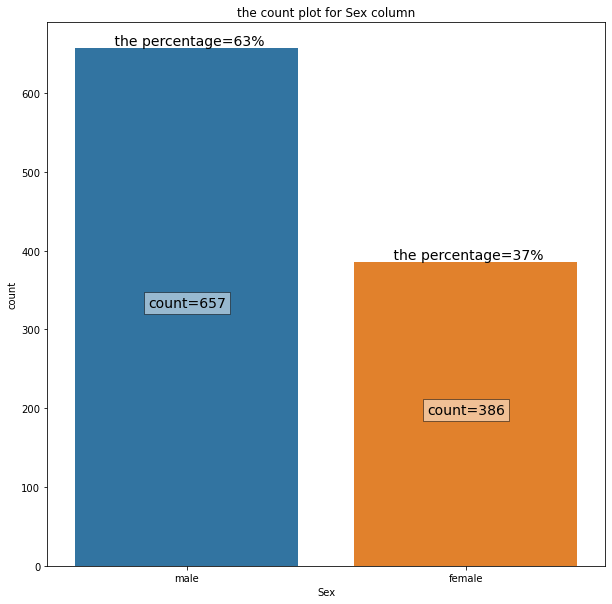

In [5]:
uni_count_plot (df_final,"Sex","the count plot for Sex column")


## (CLUSTREDBAR FOR `SEX` VS `SURVIVED`COLUMNS)

>63% from our data were male passenger :<br>
* 54% form our data were male and `did not survive`<br>
* 9% form our data were male and `did survive`<br>
<br>

>37% from our data were female passenger<br>
* 6% form our data were male and `did not survive`<br>
* 31% form our data were `male` and `did survive`<br>
<br>

><br>
we can say that most `survived gender` is `female` <br>
we can say that most most gender that` did not survive` is `male` <br>
Furthermore, half of our data were men and did not survive with percentage =54% <br>


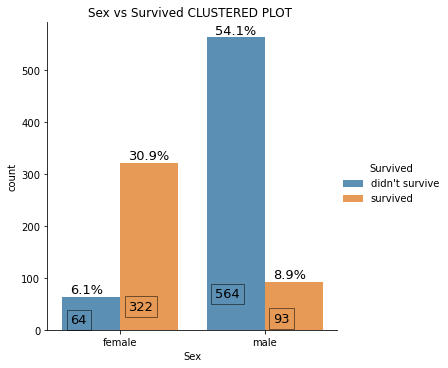

In [6]:
count_plot_2_catag_vlue("Sex","Survived",df_final,box=True)

## (COUNTPLOT FOR `EMBARKED `COLUMN)

>we can say that ,form all the passenger :<br>
* 74%&emsp;embarked from S-Southampton port
* 20%&emsp;emabrked form C-Cherbourg   port
* 8%&ensp;&ensp;&ensp;emabrked form Q-Queenstown port
> the most port that the passengers did embark from was S-Southampton port

Text(1.7, 600, 'Q-Queenstown port')

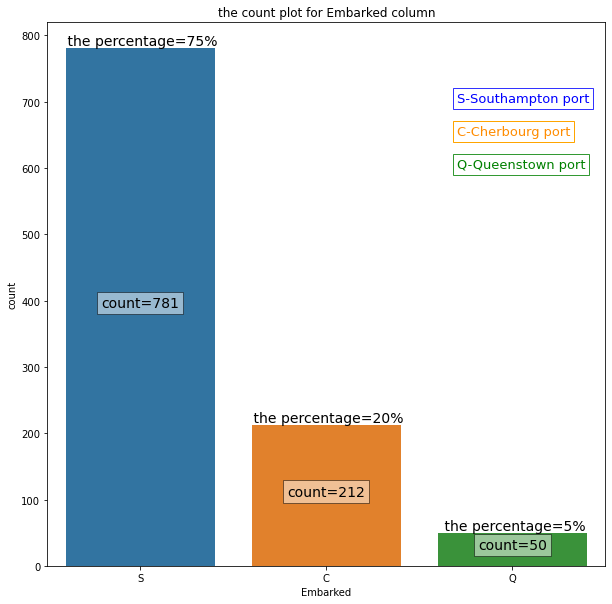

In [7]:
#plot the countplo
uni_count_plot (df_final,"Embarked","the count plot for Embarked column")
# crete legend 
Q="Q-Queenstown port"
S="S-Southampton port"
C="C-Cherbourg port"
#make the coloredge for each box to be the same as the (C,S,Q) in the countplot
props_g = dict(boxstyle='square', facecolor='none', edgecolor='green', alpha=0.8)
props_b = dict(boxstyle='square', facecolor='none', edgecolor='blue', alpha=0.8)
props_o = dict(boxstyle='square', facecolor='none', edgecolor='orange', alpha=1)

#place the the box with the text inside it sorted the same way as the countplot
plt.text(x=1.7,y=700,s=S,fontsize=13,bbox=props_b,color="blue")
plt.text(x=1.7,y=650,s=C,fontsize=13,bbox=props_o,color="darkorange")
plt.text(x=1.7,y=600,s=Q,fontsize=13,bbox=props_g,color="green")


## (CLUSTREDBAR FOR `SEX` VS `EMBARKED`COLUMNS)

we can say that from 74% of the people that emparked form S-Southampton which is the most port that the passenger embarked from :<br>
<br>
`50%  of the passenger were male` <br>
`25%  of the passenger was female` <br>
<br>
meaning half of our data were men passenger and did embark from S-Southampton


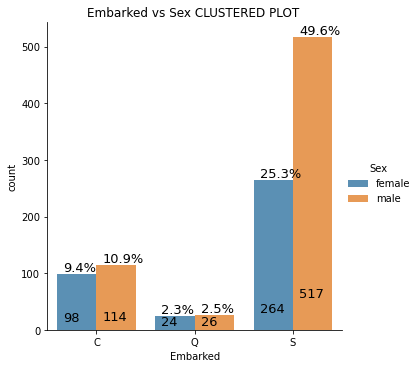

In [8]:
count_plot_2_catag_vlue("Embarked","Sex",df_final,box=False)

# (COUNTDBAR FOR `SEX"MALE"` VS `EMBARKED ="S"`COLUMNS)
we can say that from 74% of the people that emparked form S-Southampton which is the most port that the passenger embarked from :<br>
<br>
`50%  of the passenger were male` <br>
* 43% didn't survive
* 7%  did survive<br>


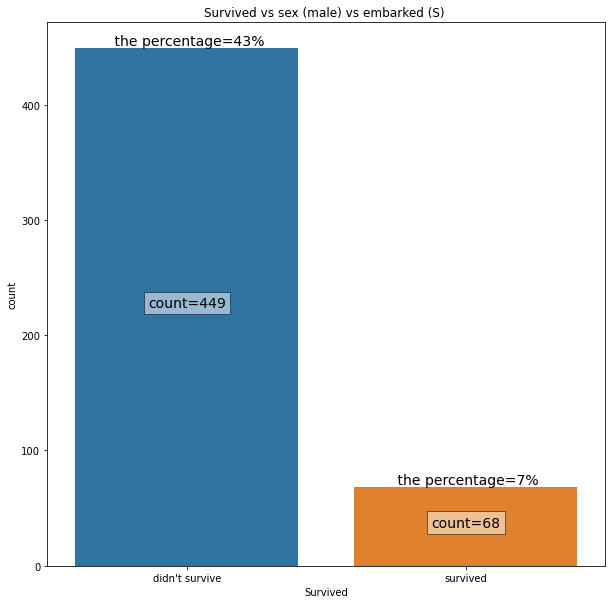

In [9]:
df_m_s=df_final[(df_final["Embarked"]=="S")&(df_final["Sex"]=="male")]#dataframe sex=male,embarked=S
uni_count_plot (df_m_s,'Survived',f"Survived vs sex (male) vs embarked (S) ")

# (COUNTDBAR FOR SEX"FEMALE" VS EMBARKED ="S"COLUMNS)
we can say that from 74% of the people that emparked form S-Southampton which is the most port that the passenger embarked from
>`25%  of the passenger was female` <br>
* 5% didn't survive
* 20%  did survive<br>


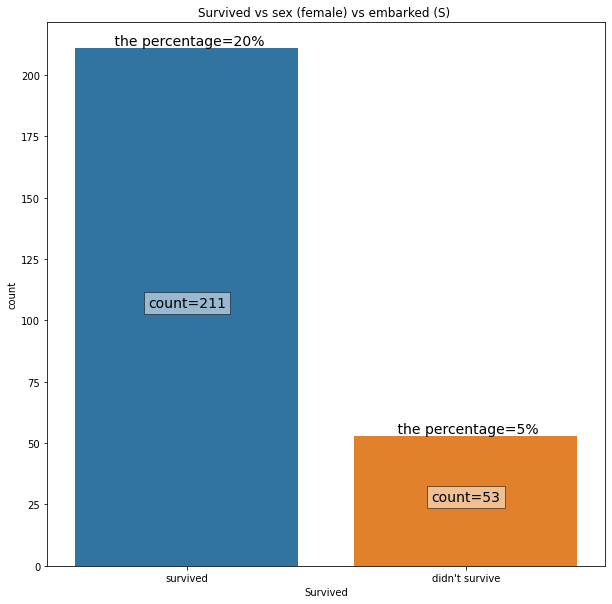

In [10]:
df_f_s=df_final[(df_final["Embarked"]=="S")&(df_final["Sex"]=="female")] #dataframe sex=male,embarked=S
uni_count_plot (df_f_s,'Survived',f"Survived vs sex (female) vs embarked (S) ")


` we can say from ` <br>
`COUNTDBAR FOR SEX"FEMALE" VS EMBARKED ="S"COLUMNS` and `(COUNTDBAR FOR SEX="MALE" VS EMBARKED ="S"COLUMNS)`
`50%  of the passenger were male` <br>
* 43% didn't survive
  
* 7%  did survive<br>
 

`25%  of the passenger was female` <br>
* 5% didn't survive
  
* 20%  did survive<br>


`we can also say :`
* the most gender of the passengers that `didn't survive` and embarked form `S-Southampton port` were `male` with a `43%` percentage form all data set
* the most gender of the passengers that `did survive` and embarked form `S-Southampton` port were `female` with a `20%` 

# (FACEGRID FOR `SEX` VS `EMBARK` VS `AGE` VS `SURVIVIED="didn't survive"`)
we can say that from 74% of the people that emparked form S-Southampton which is the most port that the passenger embarked from :<br>
<br>
`50%  of the passenger were male` <br>
* 43% didn't survive
  * most common age range is 15-55

`25%  of the passenger was female` <br>
* 5% didn't survive
   * most common age range is 2-50


Text(0.44, 1.07, "Sex vs Embarked vs didn't Survive vs Age")

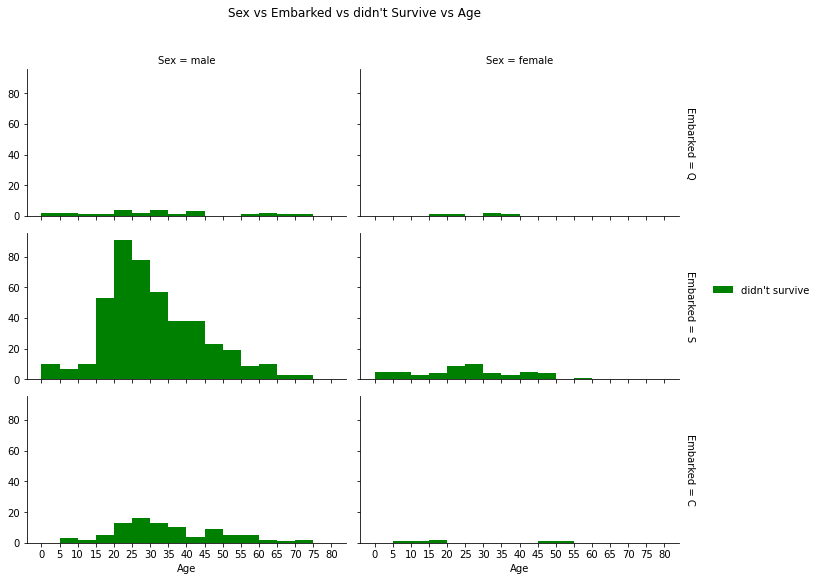

In [11]:
s = sb.FacetGrid(data =  df_final[df_final["Survived"]=="didn't survive"], col = 'Sex', row = 'Embarked', size = 2.5,aspect=2,margin_titles = True)
bins=np.arange(0,df_final["Age"].max()+5,5)
s.map(plt.hist,"Age",color="g",label="didn't survive",bins=bins)
s.add_legend()

plt.xticks(bins);
s.fig.suptitle(x=0.44,y=1.07,t="Sex vs Embarked vs didn't Survive vs Age")

# (FACEGRID FOR `SEX` VS `EMBARK` VS `AGE` VS `SURVIVIED="survived"`)
we can say that from 74% of the people that emparked form S-Southampton which is the most port that the passenger embarked from :<br>
<br>
`50%  of the passenger were male` <br>

* 7%  did survive<br>
  * most common age range is 15-50


`25%  of the passenger was female` <br>

* 20%  did survive<br>
   * most common age range is 15-40


Text(0.44, 1.07, 'Sex vs Embarked vs Survived vs Age')

<Figure size 1440x1440 with 0 Axes>

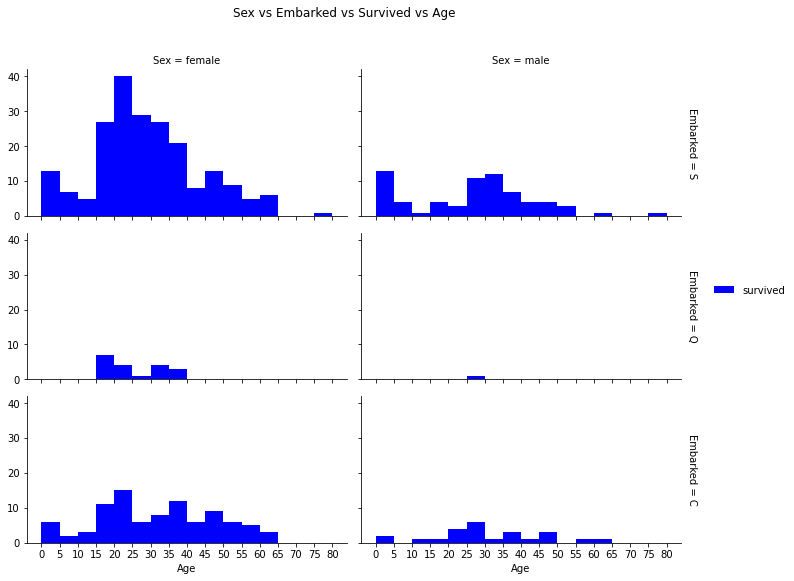

In [12]:
plt.figure(figsize=[20,20])
#dataframe with survived passenger only
df_Survived=df_final[df_final["Survived"]=="survived"]
bins=np.arange(0,df_final["Age"].max()+5,5)
g = sb.FacetGrid(data =df_Survived , col = 'Sex', row = 'Embarked', size = 2.5,aspect=2,margin_titles = True)
g.map(plt.hist,"Age",color="b",label="survived",bins=bins).add_legend()
plt.xticks(bins);
g.fig.suptitle(x=0.44,y=1.07,t='Sex vs Embarked vs Survived vs Age')

we can say that from 74% of the people that emparked form S-Southampton which is the most port that the passenger embarked from :<br>
<br>
`50%  of the passenger were male` <br>
* 43% didn't survive
  * most common age range is 15-55
  
* 7%  did survive<br>
  * most common age range is 15-50



`25%  of the passenger was female` <br>
* 5% didn't survive
   * most common age range is 2-50
  
* 20%  did survive<br>
   * most common age range is 15-40
   



#  (FACEGRID FOR `SEX` VS `EMBARK` VS  `SURVIVIED` VS `FAMILY`)
we can say that from 74% of the people that emparked form S-Southampton which is the most port that the passenger embarked from :<br>
<br>
`50%  of the passenger were male` <br>
* 43% didn't survive
  * most common family size form 1 to 4 members
* 7%  did survive<br>
  * most common family size 1 ,3, 4 members


`25%  of the passenger was female` <br>
* 5% didn't survive
   * most common family size form 1 to 5 members
* 20%  did survive<br>
   * most common family size form 1 to 4 members



Text(0.49, 1.07, 'Sex vs Embarked vs Survived vs Family')

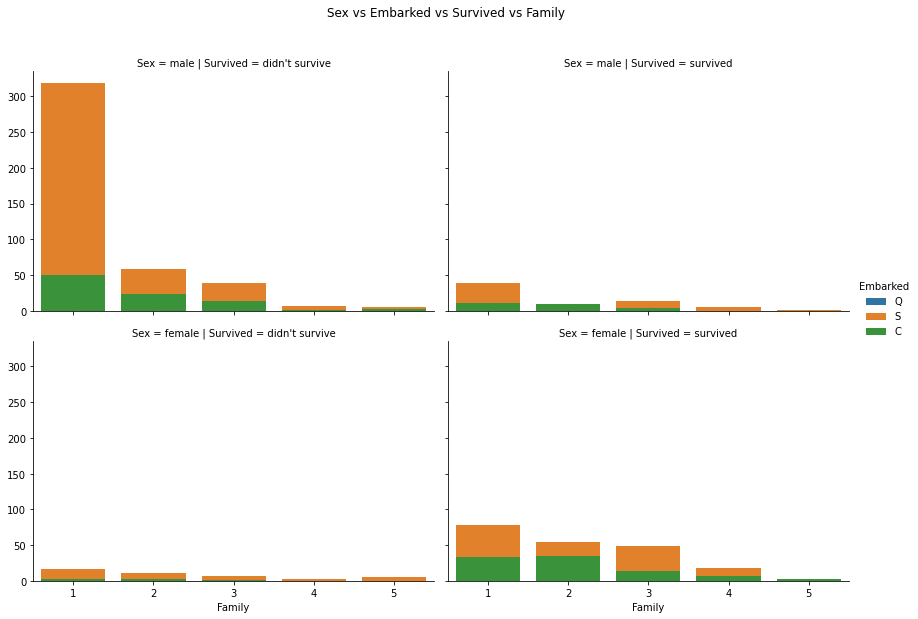

In [13]:
G=sb.FacetGrid(data=df_final,col="Survived",row="Sex",hue="Embarked",size=4,aspect=1.5)
G=G.map(sb.countplot,"Family")
G.add_legend()
G.fig.suptitle(x=0.49,y=1.07,t='Sex vs Embarked vs Survived vs Family')

# GENERAL CONCLUSION

we can say that from 74% of the people that emparked form S-Southampton which is the most port that the passenger embarked from :<br>
<br>
`50%  of the passenger were male` <br>
* 43% didn't survive
  * most common age range is 15-55
  * family size form 1 to 4 members
* 7%  did survive<br>
  * most common age range is 15-50
  * family size 1 ,3, 4 members


`25%  of the passenger was female` <br>
* 5% didn't survive
   * most common age range is 2-50
   * family size form 1 to 5 members
* 20%  did survive<br>
   * most common age range is 15-40
   * family size form 1 to 4 members


<br>


we can say also:<br>
* the most common port for male and female passenger to embark from was  S-Southampton<br>
* the most common port that people emparked from did survive and did not was  S-Southampton<br>
* half of the passenger were men that embarked from the S-Southampton port with `50% percentage from our data` set<br>
* the most gender of the passengers that `didn't survive` and embarked form `S-Southampton port` were `male` with a `43%` percentage form all data set
* the most gender of the passengers that `did survive` and embarked form `S-Southampton` port were `female` with a `20%` percentage form all data set
* the most family size  that survived and didn't survive for both the female and male passenger was = 1 meaning by that the most affected people by survived and didn't survive rate was the solo passenger 